In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import warnings
import random
warnings.simplefilter('ignore')


In [53]:
df = pd.read_csv("train1.csv", encoding = 'ISO-8859-1', low_memory = False)

In [54]:
    '''
    Функция для отображения boxplot-графиков для номинативных и смешанных переменных
    '''
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='default', 
                data=df_clients.loc[df_clients.loc[:, column].isin(df_clients.loc[:, column].value_counts().index[:20])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

IndentationError: expected an indented block (<ipython-input-54-337b10db3e28>, line 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [55]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

Посмотрим на данные:

+ client_id	идентификатор клиента
+ education	уровень образования
+ sex	пол заёмщика
+ age	возраст заёмщика
+ car	флаг наличия автомобиля
+ car_type	флаг автомобиля-иномарки
+ decline_app_cnt	количество отказанных прошлых заявок
+ good_work	флаг наличия «хорошей» работы
+ bki_request_cnt	количество запросов в БКИ
+ home_address	категоризатор домашнего адреса
+ work_address	категоризатор рабочего адреса
+ income	доход заёмщика
+ foreign_passport	наличие загранпаспорта
+ default	наличие дефолта

In [4]:
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


count    73799.000000
mean         0.126994
std          0.332968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

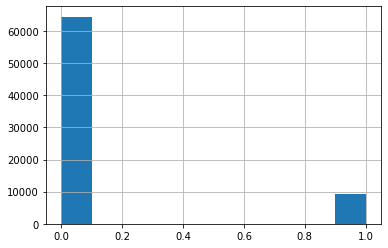

In [5]:
df.default.hist()
df.default.describe()

<AxesSubplot:>

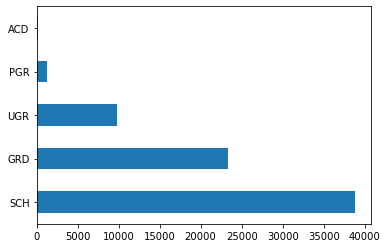

In [6]:
df['education'].value_counts().plot.barh()

count     73492
unique        5
top         SCH
freq      38860
Name: education, dtype: object

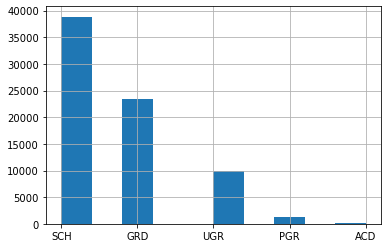

In [7]:
df.education.hist()
df.education.describe()

In [56]:
df['education'] = df['education'].apply(
    lambda x: df['education'].mode()[0] if pd.isna(x) == True else x) #Вставили моду в пустые значения

count     73799
unique        2
top           N
freq      62733
Name: foreign_passport, dtype: object

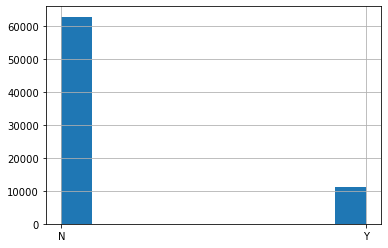

In [10]:
df.foreign_passport.hist()
df.foreign_passport.describe()

In [57]:
df['foreign_passport'] = df['foreign_passport'].replace({'N':'0','Y':'1'})# Заменяем значения на бинарные

In [58]:
df['sex'] = df['sex'].replace({'M':'0','F':'1'})# Заменяем значения на бинарные

In [59]:
df['car'] = df['car'].replace({'N':'0','Y':'1'})# Заменяем значения на бинарные

In [60]:
df['car_type'] = df['car_type'].replace({'N':'0','Y':'1'})# Заменяем значения на бинарные

In [61]:
df['education'] = df['education'].replace({'SCH':'1','GRD':'2','UGR':'3','PGR':'4','ACD':'5'})# Заменяем значения на категориальные

In [20]:
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,1,0,62,1,1,0,0,1,1,2,18000,0,0
1,63161,1,1,59,0,0,0,0,3,2,3,19000,0,0
2,25887,1,0,25,1,0,2,0,1,1,2,30000,1,0
3,16222,1,1,53,0,0,0,0,2,2,3,10000,0,0
4,101655,2,0,48,0,0,0,1,1,2,3,30000,1,0


<AxesSubplot:>

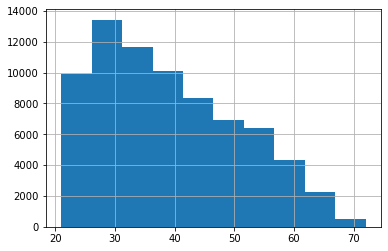

In [22]:
df.age.hist()

<AxesSubplot:>

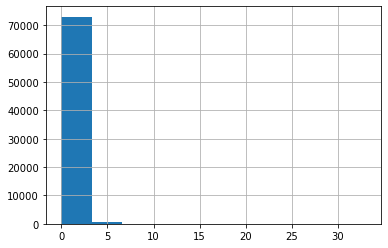

In [23]:
df.decline_app_cnt.hist()

<AxesSubplot:>

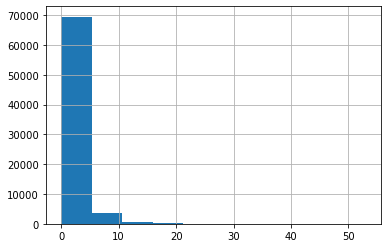

In [26]:
df.bki_request_cnt.hist()


<AxesSubplot:>

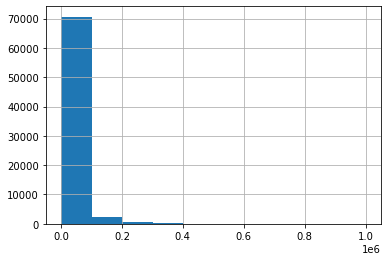

In [27]:
df.income.hist()

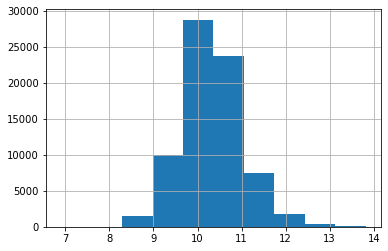

In [28]:
df['income'] = df['income'].apply(lambda w: np.log(w + 1))
df.income.hist();

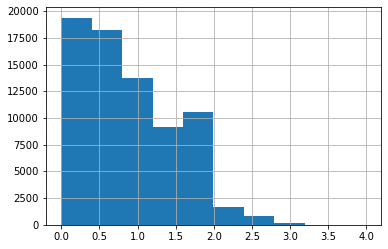

In [29]:
df['bki_request_cnt'] = df['bki_request_cnt'].apply(lambda w: np.log(w + 1))
df.bki_request_cnt.hist();

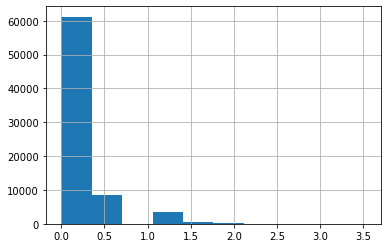

In [30]:
df['decline_app_cnt'] = df['decline_app_cnt'].apply(lambda w: np.log(w + 1))
df.decline_app_cnt.hist();

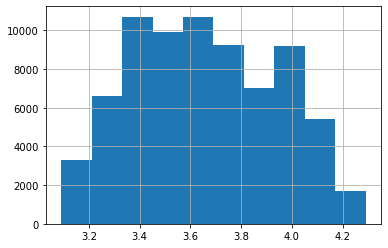

In [31]:
df['age'] = df['age'].apply(lambda w: np.log(w + 1))
df.age.hist();

count      73799.000000
mean       41099.775417
std        46166.322400
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

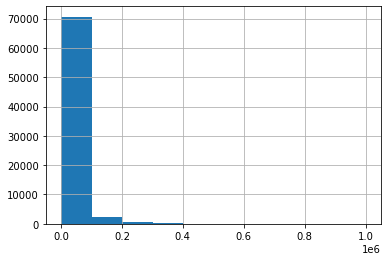

In [36]:
df.income.hist()
df.income.describe()

25-й перцентиль: 20000.0, 75-й перцентиль: 48000.0, IQR: 28000.0,  Границы выбросов: [-22000.0, 90000.0].


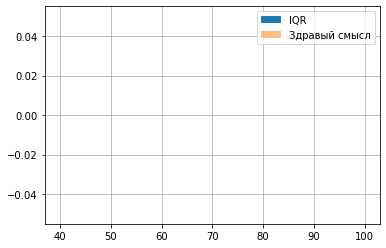

In [62]:
IQR = df.income.quantile(0.75) - df.income.quantile(0.25)
perc25 = df.income.quantile(0.25)
perc75 = df.income.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.income.loc[df.income.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
df.income.loc[df.income <= 70000].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [63]:
#Функция для заполнения выбросов ближайшим квантилем
def filling_quantile(df, col, change_quant): #quant=0.25 или 0.75
    IQR = df[col].quantile(q=0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    high_border = perc75 + 1.5*IQR
    low_border = perc25 - 1.5*IQR
    if change_quant == 0.75:
        df[col] = df[col].apply(lambda x: high_border if x>high_border else x)
    elif change_quant == 0.25:
        df[col] = df[col].apply(lambda x: low_border if x<low_border else x)
    else:
        print('Значение квантиля должно быть 0.25 или 0.75 :)')

In [64]:
filling_quantile(df,'income', 0.75) #заменяем выбосы кванилем

In [65]:
num_cols = list(set(df.columns) - set(['client_id', 'education', 'sex','car','car_type','good_work','home_address','work_address','foreign_passport','default']))

In [66]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='default', 
                data=df,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

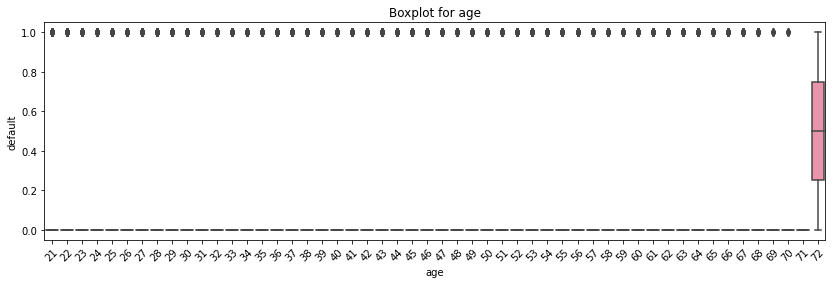

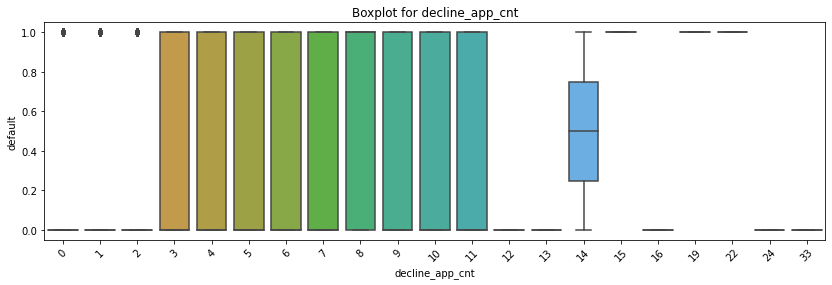

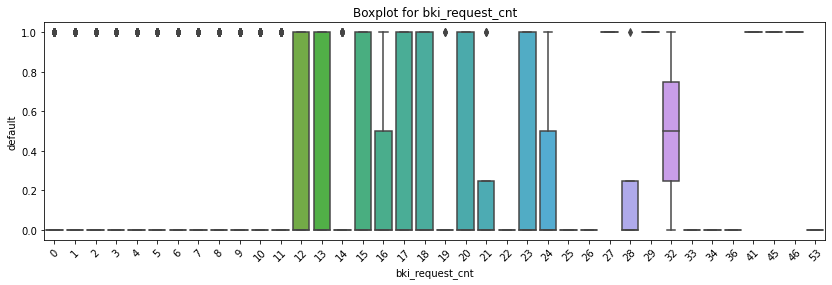

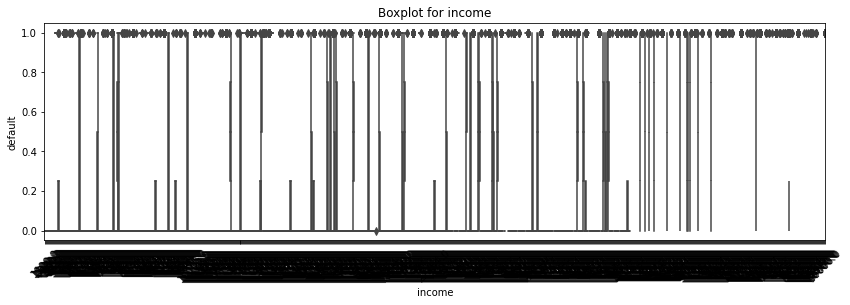

In [67]:
for col in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    get_boxplot(col)

<AxesSubplot:xlabel='income', ylabel='default'>

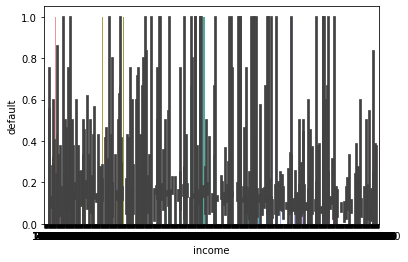

In [61]:
sns.barplot(x='income', y='default', data=df)

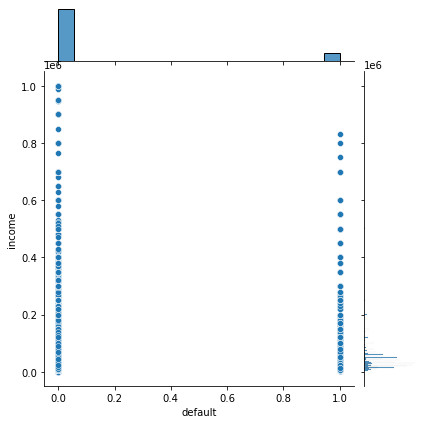

In [66]:
sns.jointplot(x = 'default', y = 'income', data = df)

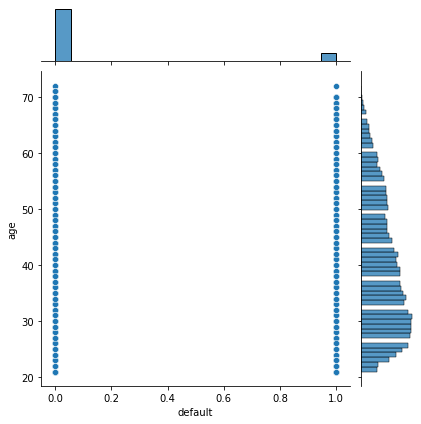

In [67]:
sns.jointplot(x = 'default', y = 'age', data = df)

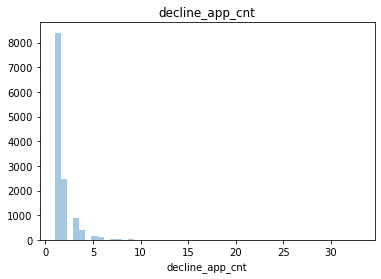

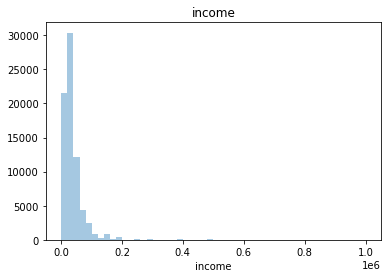

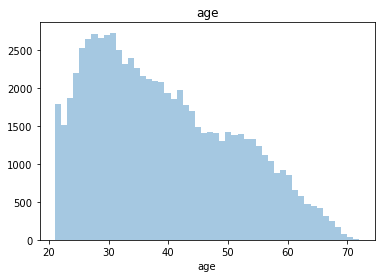

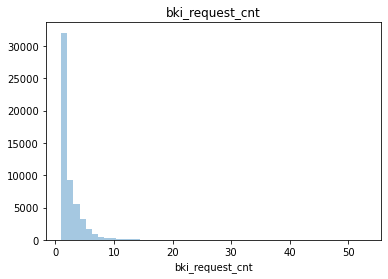

TypeError: '>' not supported between instances of 'str' and 'int'

<Figure size 432x288 with 0 Axes>

In [68]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

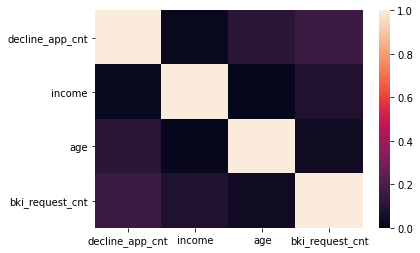

In [69]:
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1)

Корреляция между данными близка к 0, это значит что её почти нет. Признаки между собой низко коррелируемые. Это хорошо для нашей модели.

<AxesSubplot:>

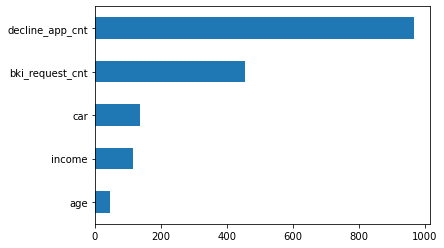

In [70]:
imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самый простой способ — отобразить каждое значение категории в уникальное число. Например, в поле sex значение sex = female преобразовать в 0, а sex = male — в 1. Эту простую операцию приходится делать достаточно часто, поэтому в модуле sklearn.preprocessing именно для этой задачи реализован класс LabelEncoder.

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [ ]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

Сработало! Теперь всегда можно обратиться к classes_ , если забыли, что закодировали. Применим LabelEncoder ко всему набору бинарных переменных.

In [ ]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

In [68]:
bin_cols = list(set(df.columns) - set(['client_id', 'education','home_address','work_address','default','age','decline_app_cnt','bki_request_cnt','income']))
cat_cols = list(set(df.columns) - set(['client_id', 'sex','car','car_type','good_work','foreign_passport','default','age','decline_app_cnt','bki_request_cnt','income']))

<AxesSubplot:>

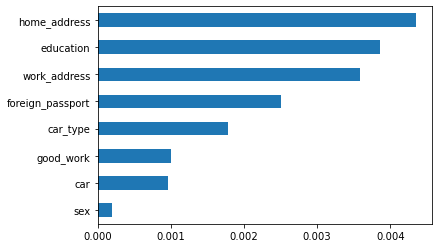

In [69]:
imp_cat = Series(mutual_info_classif(df[bin_cols + cat_cols], df['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Самый значимый бинарный признак home_address

In [70]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [71]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(df[num_cols].values)

И объединим стандартизованные числовые, бинарные и закодированные категориальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную.

In [72]:
# Объединяем

X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #метрики
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test)
probs = probs[:,1]

print('roc_auc_score:', roc_auc_score(y_test, y_pred))
print("accuracy_score:",accuracy_score(y_test, y_pred)) #метрика accuracy - количество верно определенных объектов на общее количество объектов
print("precision_score:",precision_score(y_test, y_pred)) #метрика precision точность
print("recall_score:",recall_score(y_test, y_pred)) #метрика recall полнота
print("f1_score:",f1_score(y_test, y_pred)) #метрика, которая объединяет в себе сразу и точность, и полноту F-мера

roc_auc_score: 0.5036085943508015
accuracy_score: 0.8755420054200542
precision_score: 0.38636363636363635
recall_score: 0.009304871373836891
f1_score: 0.018172100481026188


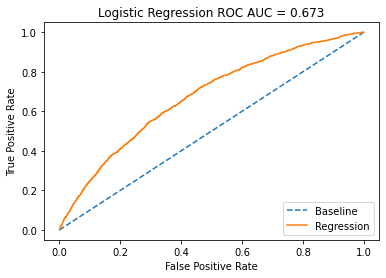

In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 1.0


In [79]:
df_copy = df.copy()

In [83]:
model = LogisticRegression(class_weight = 'balanced',max_iter=1000)
model.fit(X_train, y_train)
val_predicted = model.predict(X_test)
val_predicted_prob = model.predict_proba(X_test)

accuracy_score: 0.6122628726287263
precision_score: 0.18841970569417787
recall_score: 0.6447728516694033
f1_score: 0.29162025003094444

confusion matrix: 
 [[7859 5074]
 [ 649 1178]]

Предсказано невозращение кредита клиентом, по факту вернувшим кредит: 5074 
 или 39.23% от всех вернувших 

Предсказан возврат кредита клиентом, по факту не вернувшим кредит: 649 
или 35.52% от всех не вернувших


roc_auc_score: 0.673988156974743


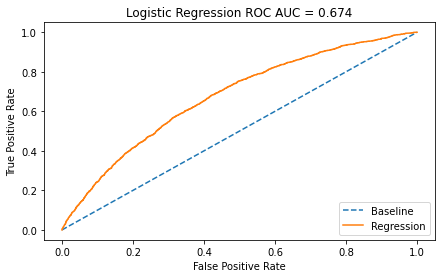

In [84]:
# Выводим получившиеся метрики
print('accuracy_score:', accuracy_score(y_test, val_predicted))
print('precision_score:', precision_score(y_test, val_predicted))
print('recall_score:', recall_score(y_test, val_predicted))
print('f1_score:', f1_score(y_test, val_predicted))
сf_mtx = confusion_matrix(y_test, val_predicted)
print()
print('confusion matrix:', '\n', сf_mtx)
tn, fp, fn, tp = сf_mtx.ravel()
print()
print('Предсказано невозращение кредита клиентом, по факту вернувшим кредит: {} \n\
 или {}% от всех вернувших \n'.format(fp, round((fp/(fp+tn))*100, 2)))
print('Предсказан возврат кредита клиентом, по факту не вернувшим кредит: {} \n\
или {}% от всех не вернувших\n'.format(fn, 
                                        round((1-recall_score(y_test,
                                                              val_predicted))*100, 2)))
print()
print('roc_auc_score:', roc_auc_score(y_test, val_predicted_prob[:, 1]))
fpr, tpr, threshold = roc_curve(y_test, val_predicted_prob[:, 1])
roc_auc = roc_auc_score(y_test, val_predicted_prob[:, 1])
plt.figure(figsize=(7, 4))
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()